# This project is about Ipl First Inning Predictions.
## STEPS:-
### 1.Importing libraries
### 2.Importing Dataset
### 3.Exploratory Data Analysis
### 4.Data Preprocessing
### 5.Model Building 
### 6.Model Evaluation

## 1.Importing Libraries

In [1]:
# Importing Libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.ensemble import ExtraTreesRegressor

from matplotlib import pyplot as plt
%matplotlib inline

## 2.Importing Dataset

In [2]:
# Loading CSV file
df = pd.read_csv('ipl.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
print('Before cleaning the data: {}'.format(df.shape))

Before cleaning the data: (76014, 15)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [5]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [6]:
# Removing the unwanted columns
df.drop(['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker'], axis=1, inplace=True)
df.head()


,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [7]:
# Considering only consistent teams
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [8]:
# Removing the first 5 overs data in every match
df = df[df['overs']>=5.0]

# Converting the column 'date' from string into datetime object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

## 3.EDA

In [9]:
# Checking the duplicate row
df.duplicated().sum()

0

In [10]:
# Checking the null value
df.isnull().sum()

date              0
bat_team          0
bowl_team         0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
total             0
dtype: int64

<AxesSubplot:>

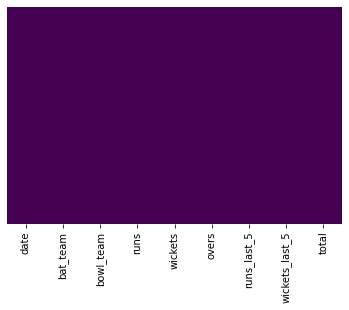

In [11]:
sns.heatmap(df.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

In [12]:
print('After cleaning the data: {}'.format(df.shape))

After cleaning the data: (40108, 9)


In [13]:
# Average score of each team in IPL
pd.DataFrame(df.groupby(['bat_team'])['total'].mean())

,total
bat_team,
Chennai Super Kings,167.495211
Delhi Daredevils,153.774978
Kings XI Punjab,163.054403
Kolkata Knight Riders,157.870247
Mumbai Indians,163.950159
Rajasthan Royals,159.511860
Royal Challengers Bangalore,162.759357
Sunrisers Hyderabad,165.360396


<AxesSubplot:>

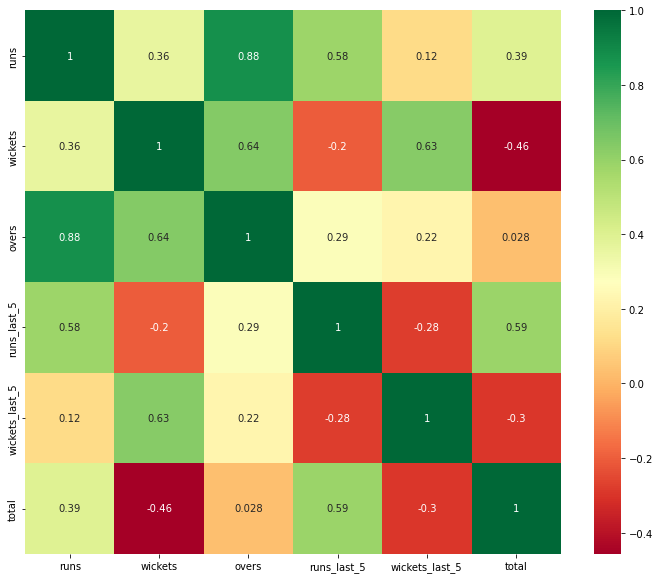

In [14]:
# Correlation of each of the feature
corrmat = df.corr()
plt.figure(figsize=(12,10))
# plot heat map
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")

## 4.Data Preprocessing 

In [15]:
# Converting categorical features using OneHotEncoding method
Dummies = pd.get_dummies(df[['bat_team', 'bowl_team']])
df = df.drop(['bat_team', 'bowl_team'], axis = 1)
df = pd.concat([df, Dummies], axis = 1)

In [16]:
df.shape

(40108, 23)

In [17]:
# Splitting the data into train and test set
train_data = df[df['date'].dt.year <= 2016]
test_data = df[df['date'].dt.year >=2017]

X_train = train_data.drop(['total', 'date'], axis=1)
X_test = test_data.drop(['total', 'date'], axis=1)

y_train = train_data['total']
y_test = test_data['total']

In [18]:
## Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train,y_train)

ExtraTreesRegressor()

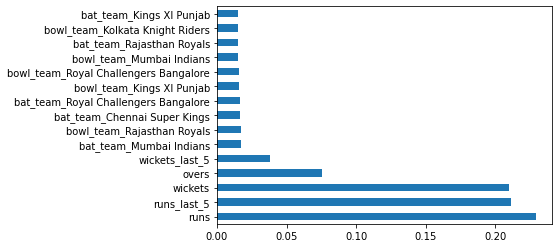

In [19]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

## 5.Model Building 

In [20]:
## Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
pred = regressor.predict(X_train)

In [22]:
from sklearn import metrics
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train RMSE: 17.530606671826085


In [23]:
predict=regressor.predict(X_test)

<AxesSubplot:xlabel='total', ylabel='Density'>

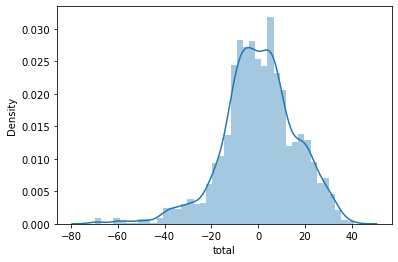

In [24]:
import seaborn as sns
sns.distplot(y_test-predict)


## 6.Model Evaluation

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 12.118617546193244
MSE: 251.007923104173
RMSE: 15.843229566732061


In [26]:
# Creating a pickle file for the classifier
import pickle
filename = 'first-innings-score-lr-model.pkl'
pickle.dump(regressor, open(filename, 'wb'))